In [7]:
import numpy as np
import matplotlib.pyplot as plt

from agent import Agent

In [2]:
game_name = 'VideoPinball-v0'

agent = Agent(game_name, 'cuda:0')

Using device:  cuda:0


In [3]:
rewards, losses, steps = agent.train()

Episode  0
Episode  1
Episode  2
Episode  3
Episode  4
Episode  5
Episode  6
Episode  7
Episode  8
Episode  9
Episode  10
Episode  11
Episode  12
Episode  13
Episode  14
Episode  15
Episode  16
Episode  17
Episode  18
Episode  19
Episode  20
Episode  21
Episode  22
Episode  23
Episode  24
Episode  25
Episode  26
Episode  27
Episode  28
Episode  29
Episode  30
Episode  31
Episode  32
Episode  33
Episode  34
Episode  35
Episode  36
Episode  37
Episode  38
Episode  39
Episode  40
Episode  41
Episode  42
Episode  43
Episode  44
Episode  45
Episode  46
Episode  47
Episode  48
Episode  49
Episode  50
Episode  51
Episode  52
Episode  53
Episode  54
Episode  55
Episode  56
Episode  57
Episode  58
Episode  59
Episode  60
Episode  61
Episode  62
Episode  63
Episode  64
Episode  65
Episode  66
Episode  67
Episode  68
Episode  69
Episode  70
Episode  71
Episode  72
Episode  73
Episode  74
Episode  75
Episode  76
Episode  77
Episode  78
Episode  79
Episode  80
Episode  81
Episode  82
Episode  83
Ep

Episode  639
Episode  640
Episode  641
Episode  642
Episode  643
Episode  644
Episode  645
Episode  646
Episode  647
Episode  648
Episode  649
Episode  650
Episode  651
Episode  652
Episode  653
Episode  654
Episode  655
Episode  656
Episode  657
Episode  658
Episode  659
Episode  660
Episode  661
Episode  662
Episode  663
Episode  664
Episode  665
Episode  666
Episode  667
Episode  668
Episode  669
Episode  670
Episode  671
Episode  672
Episode  673
Episode  674
Episode  675
Episode  676
Episode  677
Episode  678
Episode  679
Episode  680
Episode  681
Episode  682
Episode  683
Episode  684
Episode  685
Episode  686
Episode  687
Episode  688
Episode  689
Episode  690
Episode  691
Episode  692
Episode  693
Episode  694
Episode  695
Episode  696
Episode  697
Episode  698
Episode  699
Episode  700
Episode  701
Episode  702
Episode  703
Episode  704
Episode  705
Episode  706
Episode  707
Episode  708
Episode  709
Episode  710
Episode  711
Episode  712
Episode  713
Episode  714
Episode  715

In [4]:
assert len(rewards) == len(losses) == len(steps)

episodes_info = list(zip(rewards, losses, steps))
for i, (reward, loss, step) in enumerate(episodes_info):
    #print('Episode %d :' % i)
    print('Step - ', step)
    print('Reward - ', reward)
    print('Loss - ', loss)
    print('\n')

Step -  509
Reward -  8910.0
Loss -  5018.9580078125


Step -  844
Reward -  1612.0
Loss -  8458.744140625


Step -  1142
Reward -  2507.0
Loss -  5954.1669921875


Step -  1434
Reward -  5601.0
Loss -  4079.05810546875


Step -  2487
Reward -  33920.0
Loss -  44426.7890625


Step -  3015
Reward -  9216.0
Loss -  315.04083251953125


Step -  3815
Reward -  21015.0
Loss -  6898.59423828125


Step -  4656
Reward -  21718.0
Loss -  4083.8037109375


Step -  5097
Reward -  10015.0
Loss -  34727.56640625


Step -  5701
Reward -  12115.0
Loss -  32218.240234375


Step -  6010
Reward -  2512.0
Loss -  5329.11279296875


Step -  6514
Reward -  9711.0
Loss -  3139.267578125


Step -  6796
Reward -  2605.0
Loss -  2835.41748046875


Step -  7843
Reward -  29328.0
Loss -  315.04083251953125


Step -  8200
Reward -  1603.0
Loss -  502608.0625


Step -  8632
Reward -  2606.0
Loss -  10343.130859375


Step -  9154
Reward -  7712.0
Loss -  44107.19921875


Step -  9372
Reward -  2608.0
Loss -  2199.3

Reward -  1505.0
Loss -  937.5


Step -  245451
Reward -  901.0
Loss -  0.0


Step -  245696
Reward -  1303.0
Loss -  312.53125


Step -  246008
Reward -  0.0
Loss -  625.03125


Step -  246397
Reward -  905.0
Loss -  312.5


Step -  246746
Reward -  100.0
Loss -  0.0


Step -  246999
Reward -  200.0
Loss -  0.0


Step -  247308
Reward -  502.0
Loss -  312.5


Step -  247550
Reward -  4900.0
Loss -  0.0


Step -  247801
Reward -  905.0
Loss -  312.5


Step -  248251
Reward -  1506.0
Loss -  32500.0


Step -  248719
Reward -  1507.0
Loss -  312.5


Step -  249127
Reward -  5400.0
Loss -  0.0625


Step -  249453
Reward -  2303.0
Loss -  625.0


Step -  249877
Reward -  302.0
Loss -  0.03125


Step -  250230
Reward -  201.0
Loss -  312.5


Step -  250538
Reward -  2506.0
Loss -  1562.5


Step -  251030
Reward -  1904.0
Loss -  625.03125


Step -  251299
Reward -  3502.0
Loss -  0.0


Step -  251477
Reward -  102.0
Loss -  0.0


Step -  251785
Reward -  2503.0
Loss -  312.5


Step -  25224

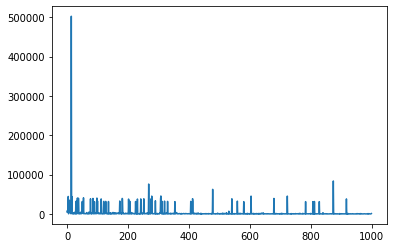

In [10]:
plt.plot(range(len(losses)), losses)
plt.show()

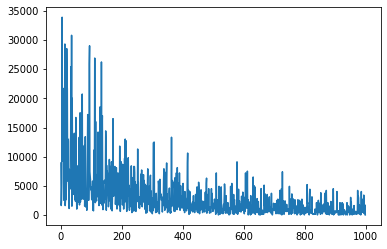

In [11]:
plt.plot(range(len(rewards)), rewards)
plt.show()